In [3]:
!mamba install -y -c bioconda pymsaviz

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


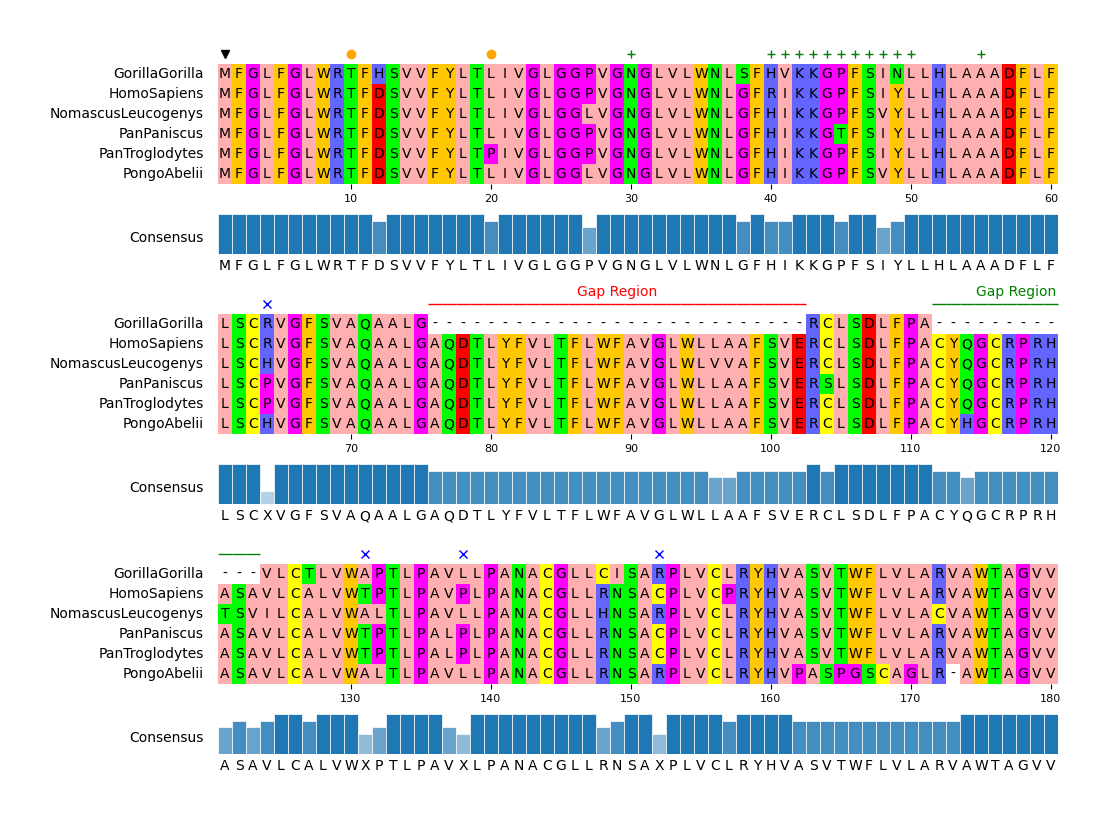

In [4]:
from pymsaviz import MsaViz, get_msa_testdata

msa_file = get_msa_testdata("MRGPRG.fa")
mv = MsaViz(msa_file, end=180, wrap_length=60, show_consensus=True)

# Extract MSA positions less than 50% consensus identity
pos_ident_less_than_50 = []
ident_list = mv._get_consensus_identity_list()
for pos, ident in enumerate(ident_list, 1):
    if ident <= 50:
        pos_ident_less_than_50.append(pos)

# Add markers
mv.add_markers([1])
mv.add_markers([10, 20], color="orange", marker="o")
mv.add_markers([30, (40, 50), 55], color="green", marker="+")
mv.add_markers(pos_ident_less_than_50, marker="x", color="blue")
# Add text annotations
mv.add_text_annotation((76, 102), "Gap Region", text_color="red", range_color="red")
mv.add_text_annotation((112, 123), "Gap Region", text_color="green", range_color="green")

mv.savefig("api_example03.png")

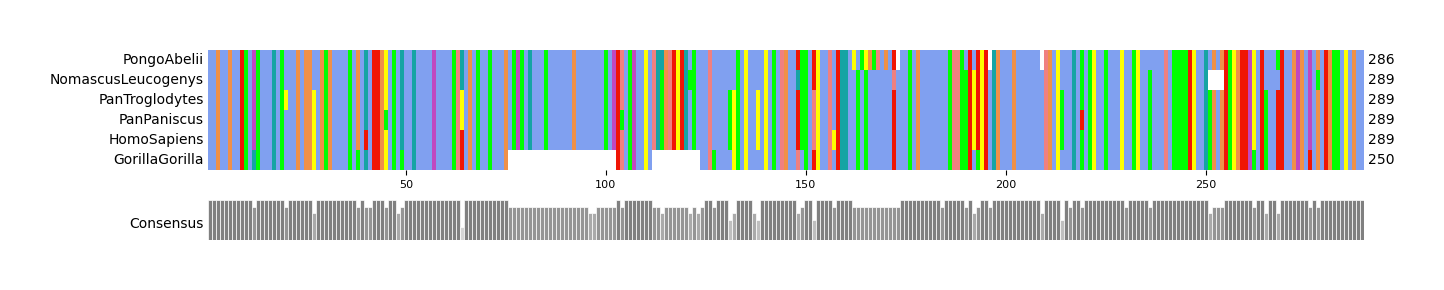

In [6]:
mv = MsaViz(msa_file, color_scheme="Clustal", show_seq_char=False, show_count=True, sort=True, show_consensus=True, consensus_color="grey")
mv.set_plot_params(ticks_interval=50, x_unit_size=0.04, show_consensus_char=False)
fig = mv.plotfig()

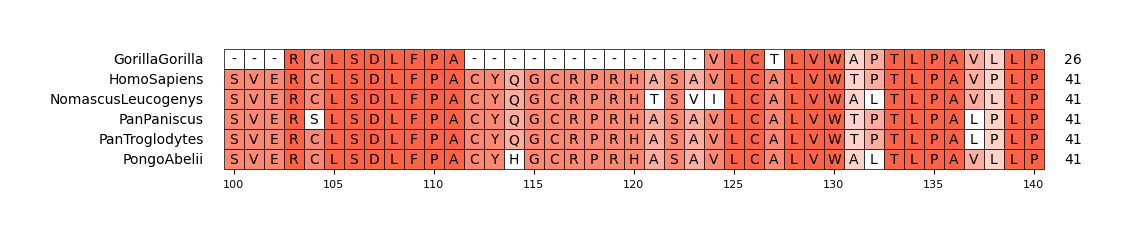

In [7]:
mv = MsaViz(msa_file, start=100 ,end=140, show_grid=True, show_count=True, color_scheme="Identity")
mv.set_plot_params(ticks_interval=5, x_unit_size=0.20, grid_color="black", identity_color="tomato")
fig = mv.plotfig()